In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report, confusion_matrix
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

train = pd.read_csv('/datasets/train_oil.csv')
test = pd.read_csv('/datasets/oil_test.csv')

print(f"Train shape: {train.shape}")
print(f"Test shape: {test.shape}")
display(train.head())
display(test.head())
print(train.info())
print(test.info())
display(train.describe())
display(test.describe())

Train shape: (309, 20)
Test shape: (133, 19)


,Field name,Reservoir unit,Country,Region,Basin name,Tectonic regime,Latitude,Longitude,Operator company,Onshore/Offshore,Hydrocarbon type,Reservoir status,Structural setting,Depth,Reservoir period,Lithology,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability
0,ZHIRNOV,MELEKESKIAN,RUSSIA,FORMER SOVIET UNION,VOLGA-URAL,COMPRESSION/EVAPORITE,51.0000,44.8042,NIZHNEVOLZHSKNET,ONSHORE,OIL,DECLINING PRODUCTION,FORELAND,1870,CARBONIFEROUS,SANDSTONE,262.0,33.0,24.0,30.0
1,LAGOA PARDA,LAGOA PARDA (URUCUTUCA),BRAZIL,LATIN AMERICA,ESPIRITO SANTO,EXTENSION,-19.6017,-39.8332,PETROBRAS,ONSHORE,OIL,NEARLY DEPLETED,PASSIVE MARGIN,4843,PALEOGENE,SANDSTONE,2133.0,72.0,23.0,350.0
2,ABQAIQ,ARAB D,SAUDI ARABIA,MIDDLE EAST,THE GULF,COMPRESSION/EVAPORITE,26.0800,49.8100,SAUDI ARAMCO,ONSHORE,OIL,REJUVENATING,FORELAND,6050,JURASSIC,LIMESTONE,250.0,184.0,21.0,410.0
3,MURCHISON,BRENT,UK /NORWAY,EUROPE,NORTH SEA NORTHERN,EXTENSION,61.3833,1.7500,CNR,OFFSHORE,OIL,NEARLY DEPLETED,RIFT,8988,JURASSIC,SANDSTONE,425.0,300.0,22.0,750.0
4,WEST PEMBINA,NISKU (PEMBINA L POOL),CANADA,NORTH AMERICA,WESTERN CANADA,COMPRESSION,53.2287,-115.8008,NUMEROUS,ONSHORE,OIL,UNKNOWN,FORELAND,9306,DEVONIAN,DOLOMITE,233.0,167.0,11.8,1407.0


,Field name,Reservoir unit,Country,Region,Basin name,Tectonic regime,Latitude,Longitude,Operator company,Hydrocarbon type,Reservoir status,Structural setting,Depth,Reservoir period,Lithology,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability
0,ABU GHARADIG,BAHARIYA,EGYPT,AFRICA,ABU GHARADIG,EXTENSION,29.7422,28.4925,GUPCO,GAS-CONDENSATE,MATURE PRODUCTION,RIFT,10282,CRETACEOUS,SANDSTONE,745.0,144.0,10.0,8.0
1,ABU MADI-EL QARA,ABU MADI (LEVEL III),EGYPT,AFRICA,NILE DELTA,STRIKE-SLIP/TRANSTENSION/SHALE/EVAPORITE/BASEM...,31.4382,31.3616,IEOC,GAS,DECLINING PRODUCTION,WRENCH/DELTA,10499,NEOGENE,SANDSTONE,509.0,410.0,20.0,300.0
2,ALIBEKMOLA,KT I,KAZAKHSTAN,FORMER SOVIET UNION,CASPIAN NORTH,COMPRESSION/EVAPORITE,48.4740,57.6667,KAZAKHOIL AKTOBE,OIL,DEVELOPING,SUB-SALT/FORELAND,6000,CARBONIFEROUS,LIMESTONE,300.0,105.0,10.0,20.0
3,ALWYN NORTH,BRENT (BRENT EAST),UK,EUROPE,NORTH SEA NORTHERN,INVERSION/COMPRESSION/EXTENSION,60.7833,1.7333,TOTAL,OIL,NEARLY DEPLETED,RIFT,9790,JURASSIC,SANDSTONE,886.0,344.0,17.0,500.0
4,ANKLESHWAR,ANKLESHWAR (HAZAD-ARDOL),INDIA,FAR EAST,CAMBAY,STRIKE-SLIP/TRANSPRESSION/BASEMENT-I,21.6000,72.9167,ONGC,OIL,MATURE PRODUCTION,WRENCH/RIFT,2950,PALEOGENE,SANDSTONE,670.0,0.0,21.0,250.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Field name                      309 non-null    object 
 1   Reservoir unit                  309 non-null    object 
 2   Country                         282 non-null    object 
 3   Region                          271 non-null    object 
 4   Basin name                      271 non-null    object 
 5   Tectonic regime                 309 non-null    object 
 6   Latitude                        282 non-null    float64
 7   Longitude                       279 non-null    float64
 8   Operator company                309 non-null    object 
 9   Onshore/Offshore                309 non-null    object 
 10  Hydrocarbon type                309 non-null    object 
 11  Reservoir status                309 non-null    object 
 12  Structural setting              309 

,Latitude,Longitude,Depth,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability
count,282.00000,279.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,35.62426,-12.508435,6755.669903,760.087379,183.683236,17.825178,476.994757
std,22.19116,86.387220,3628.094135,1353.934404,282.252489,7.171048,1000.140605
min,-38.39890,-151.615300,220.000000,11.000000,2.120000,1.100000,0.010000
25%,28.24915,-102.336500,4059.000000,128.000000,45.000000,12.000000,10.000000
50%,38.13500,1.810000,6500.000000,312.000000,110.000000,17.000000,68.000000
75%,52.13360,56.179900,9186.000000,715.000000,205.000000,23.600000,390.000000
max,76.44620,148.417000,19888.000000,8200.000000,2976.000000,35.000000,7500.000000


,Latitude,Longitude,Depth,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability
count,120.000000,117.000000,133.000000,133.000000,133.000000,133.000000,133.000000
mean,35.363842,-1.901811,6283.721805,841.353383,201.558346,18.173383,453.471278
std,20.731197,92.192549,3430.413586,1635.133723,282.618018,8.401204,1059.074464
min,-38.278600,-119.678800,600.000000,30.000000,0.000000,1.760000,0.040000
25%,28.837525,-102.434900,3300.000000,150.000000,35.000000,11.200000,10.000000
50%,37.791700,6.855300,5900.000000,330.000000,98.000000,18.000000,95.000000
75%,50.333300,75.183300,8800.000000,770.000000,213.000000,24.000000,440.000000
max,69.185000,147.709400,18425.000000,12500.000000,1600.000000,55.000000,7500.000000


Field name                         0
Reservoir unit                     0
Country                           27
Region                            38
Basin name                        38
Tectonic regime                    0
Latitude                          27
Longitude                         30
Operator company                   0
Onshore/Offshore                   0
Hydrocarbon type                   0
Reservoir status                   0
Structural setting                 0
Depth                              0
Reservoir period                   0
Lithology                          0
Thickness (gross average ft)       0
Thickness (net pay average ft)     0
Porosity                           0
Permeability                       0
dtype: int64
Field name                         0
Reservoir unit                     0
Country                           13
Region                            16
Basin name                         8
Tectonic regime                    0
Latitude                 

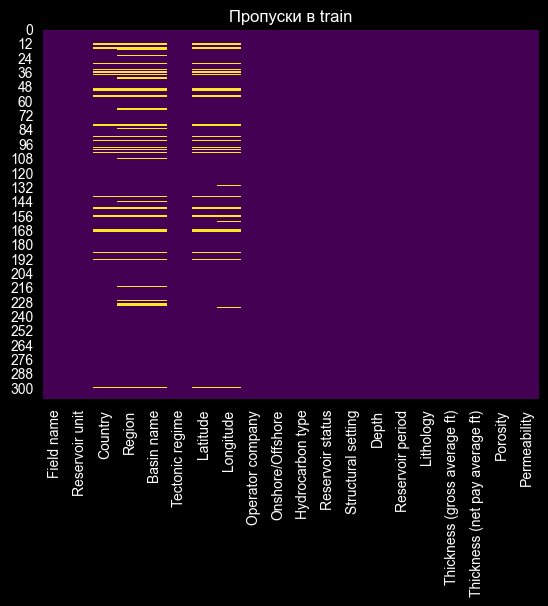

In [109]:
# Пропуски по колонкам
print(train.isnull().sum())
print(test.isnull().sum())

# Визуализация
sns.heatmap(train.isnull(), cbar=False, cmap='viridis')
plt.title('Пропуски в train')
plt.show()

In [110]:
# ===Предобработка=== #
# Заменяем пропуски (категориальные - UNKNOWN, числовые - медиана)

# train
train['Country'] = train['Country'].fillna('UNKNOWN')
train['Region'] = train['Region'].fillna('UNKNOWN')
train['Basin name'] = train['Basin name'].fillna('UNKNOWN')
train['Latitude'] = train['Latitude'].fillna(train['Latitude'].median())
train['Longitude'] = train['Longitude'].fillna(train['Longitude'].median())
# test
test['Country'] = test['Country'].fillna('UNKNOWN')
test['Region'] = test['Region'].fillna('UNKNOWN')
test['Basin name'] = test['Basin name'].fillna('UNKNOWN')
test['Latitude'] = test['Latitude'].fillna(test['Latitude'].median())
test['Longitude'] = test['Longitude'].fillna(test['Longitude'].median())
display(train.isnull().sum())
display(test.isnull().sum())

Field name                        0
Reservoir unit                    0
Country                           0
Region                            0
Basin name                        0
Tectonic regime                   0
Latitude                          0
Longitude                         0
Operator company                  0
Onshore/Offshore                  0
Hydrocarbon type                  0
Reservoir status                  0
Structural setting                0
Depth                             0
Reservoir period                  0
Lithology                         0
Thickness (gross average ft)      0
Thickness (net pay average ft)    0
Porosity                          0
Permeability                      0
dtype: int64

Field name                        0
Reservoir unit                    0
Country                           0
Region                            0
Basin name                        0
Tectonic regime                   0
Latitude                          0
Longitude                         0
Operator company                  0
Hydrocarbon type                  0
Reservoir status                  0
Structural setting                0
Depth                             0
Reservoir period                  0
Lithology                         0
Thickness (gross average ft)      0
Thickness (net pay average ft)    0
Porosity                          0
Permeability                      0
dtype: int64

In [111]:
# Количество уникальных

cat_cols = ['Country', 'Region', 'Basin name', 'Tectonic regime', 'Operator company',
            'Hydrocarbon type', 'Reservoir status', 'Structural setting',
            'Reservoir period', 'Lithology', 'Onshore/Offshore']

for col in cat_cols:
    print(f"{col} unique in train: {train[col].nunique()}")
    print(train[col].value_counts().head())

Country unique in train: 43
Country
USA        80
CANADA     33
UNKNOWN    27
UK         22
CHINA      20
Name: count, dtype: int64
Region unique in train: 8
Region
NORTH AMERICA          110
FAR EAST                46
EUROPE                  39
UNKNOWN                 38
FORMER SOVIET UNION     25
Name: count, dtype: int64
Basin name unique in train: 94
Basin name
UNKNOWN                            38
WESTERN CANADA                     24
GULF OF MEXICO NORTHERN ONSHORE    19
NORTH SEA CENTRAL                  14
NORTH SEA NORTHERN                 12
Name: count, dtype: int64
Tectonic regime unique in train: 55
Tectonic regime
COMPRESSION                        72
COMPRESSION/EROSION                29
EXTENSION                          28
COMPRESSION/EVAPORITE              22
INVERSION/COMPRESSION/EXTENSION    20
Name: count, dtype: int64
Operator company unique in train: 138
Operator company
NUMEROUS      28
PETROCHINA    17
CHEVRON       16
BP            12
EXXONMOBIL    10
Name: co

Onshore/Offshore
ONSHORE             0.705502
OFFSHORE            0.278317
ONSHORE-OFFSHORE    0.016181
Name: proportion, dtype: float64


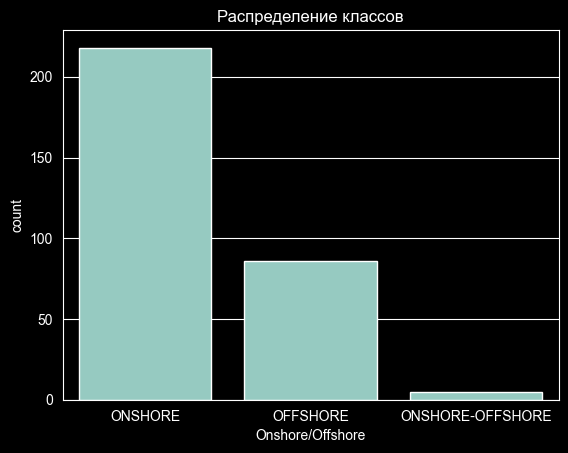

In [112]:
# Визуализация распределения

print(train['Onshore/Offshore'].value_counts(normalize=True))

sns.countplot(x='Onshore/Offshore', data=train)
plt.title('Распределение классов')
plt.show()

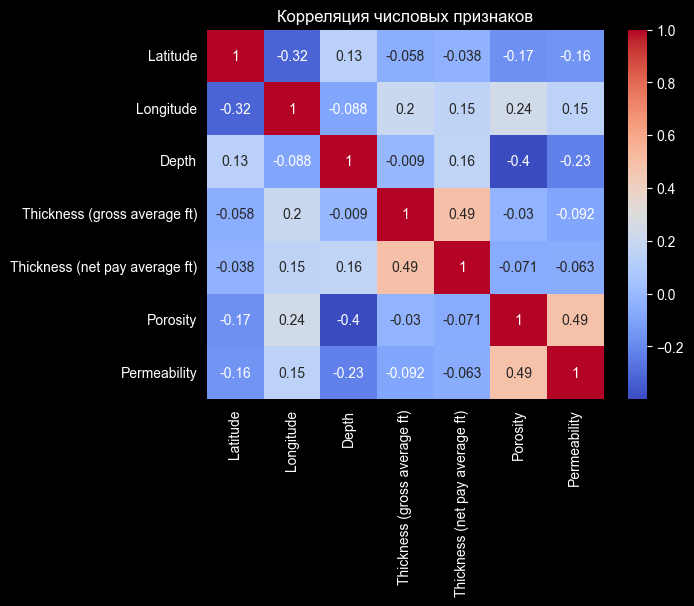

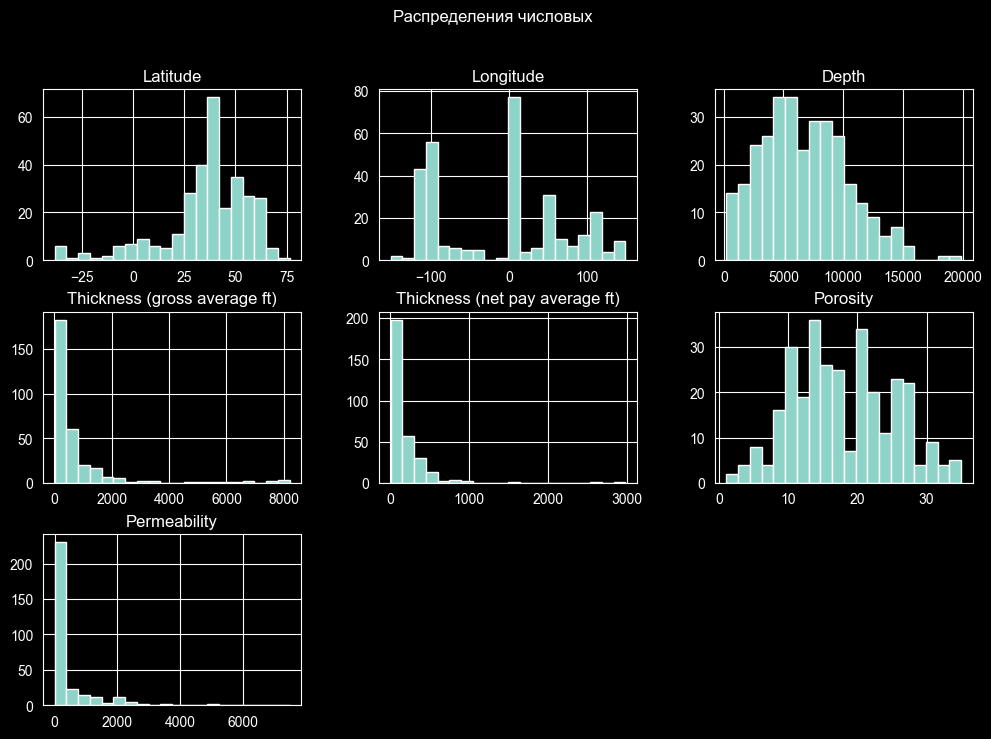

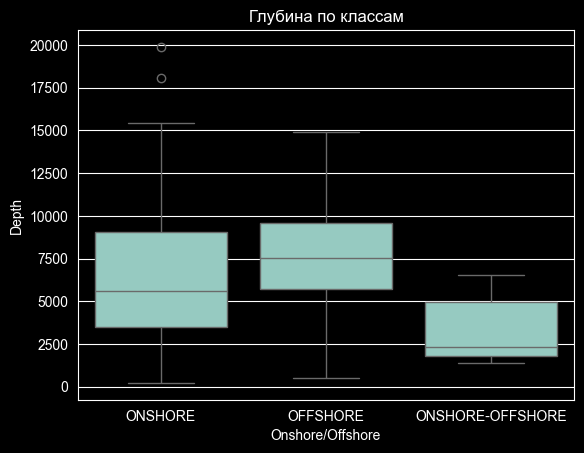

In [113]:
# Корреляция числовых признаков

num_cols = ['Latitude', 'Longitude', 'Depth', 'Thickness (gross average ft)',
            'Thickness (net pay average ft)', 'Porosity', 'Permeability']

corr_matrix = train[num_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляция числовых признаков')
plt.show()

# Распределения
train[num_cols].hist(bins=20, figsize=(12, 8))
plt.suptitle('Распределения числовых')
plt.show()

# Boxplot по классам
sns.boxplot(x='Onshore/Offshore', y='Depth', data=train)
plt.title('Глубина по классам')
plt.show()

In [114]:
# Группировка уникальных значений

for col in cat_cols:
    if col == 'Basin name' or col == 'Operator company':
        train[col] = np.where(train[col].value_counts()[train[col]] < 2, 'OTHER', train[col])
    if col == 'Tectonic regime':
        trs = train[col]
        trs = trs.str.split('/').explode().unique()
        for r in trs:
            train[f'HAS_{r}'] = train[col].str.contains(r).astype(int)

До log: count     309.000000
mean      476.994757
std      1000.140605
min         0.010000
25%        10.000000
50%        68.000000
75%       390.000000
max      7500.000000
Name: Permeability, dtype: float64
После log: count    309.000000
mean       4.230052
std        2.249044
min        0.009950
25%        2.397895
50%        4.234107
75%        5.968708
max        8.922792
Name: Permeability_log, dtype: float64


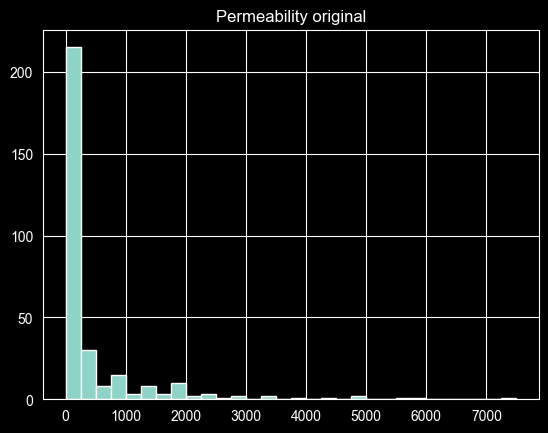

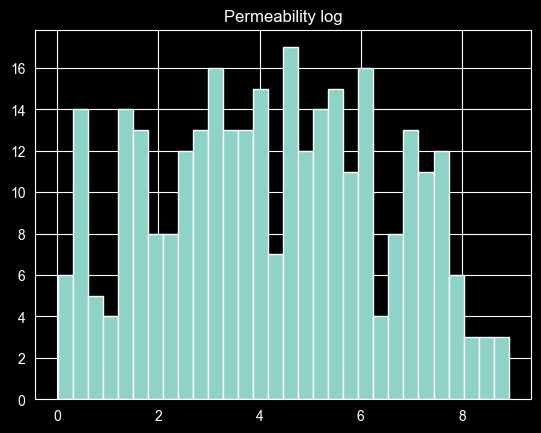

In [115]:
print("До log:", train['Permeability'].describe())
train['Permeability_log'] = np.log1p(train['Permeability'])  # log1p для 0 значений
print("После log:", train['Permeability_log'].describe())

# Гистограммы
train['Permeability'].hist(bins=30)
plt.title('Permeability original')
plt.show()
train['Permeability_log'].hist(bins=30)
plt.title('Permeability log')
plt.show()

train['Thickness_gross_log'] = np.log1p(train['Thickness (gross average ft)'])

In [116]:
test['Permeability_log'] = np.log1p(test['Permeability'])
test['Thickness_gross_log'] = np.log1p(test['Thickness (gross average ft)'])

# Для Tectonic regime в test (аналогично train)
test['Tectonic regime'] = test['Tectonic regime'].fillna('UNKNOWN')
unique_regimes = set('/'.join(train['Tectonic regime'].dropna()).split('/'))  # Из train, чтобы一致ность
for r in unique_regimes:
    if r.strip():  # Не пустая
        test[f'HAS_{r}'] = test['Tectonic regime'].str.contains(r, na=False).astype(int)

# Группировка редких в test (используйте counts из train, чтобы избежать leakage)
for col in ['Basin name', 'Operator company']:
    counts_train = train[col].value_counts()
    rare = counts_train[counts_train < 2].index  # Ваш порог, но лучше <5
    test[col] = test[col].apply(lambda x: 'OTHER' if x in rare or pd.isnull(x) else x)


# === КОДИРОВАНИЕ И ОБРАБОТКА РЕДКОГО КЛАССА ===
le = LabelEncoder()
train['Onshore/Offshore_encoded'] = le.fit_transform(train['Onshore/Offshore'])

print("Распределение классов до обработки:")
print(pd.Series(train['Onshore/Offshore_encoded']).value_counts())

# Выводим соответствие кодов и названий
print("\nСоответствие кодов классам:")
for code, name in enumerate(le.classes_):
    print(f"{code} → {name}")

# Объединяем редкий класс ONSHORE-OFFSHORE (код 2) с OFFSHORE (код 0)
train['Onshore/Offshore'] = train['Onshore/Offshore_encoded'].replace(2, 0)

print("\nРаспределение после объединения (ONSHORE-OFFSHORE → OFFSHORE):")
print(train['Onshore/Offshore'].value_counts())

# Удаляем временную колонку
train.drop('Onshore/Offshore_encoded', axis=1, inplace=True)

# Перекодируем в 0 и 1 (для бинарной задачи)
le = LabelEncoder()
train['Onshore/Offshore'] = le.fit_transform(train['Onshore/Offshore'])

print("\nФинальные классы:")
print(le.classes_)

# Подготовка X и X_test
X = train.drop(['Onshore/Offshore', 'Field name', 'Reservoir unit'], axis=1)
y = train['Onshore/Offshore']

X_test = test.drop(['Field name', 'Reservoir unit'], axis=1)

# === FEATURE ENGINEERING ===
# 1. Log-признаки (уже добавлены в train/test)
# 2. Бинарные HAS_ и группировка OTHER (уже сделаны)

# Новые признаки
X['Dist_from_equator'] = np.abs(X['Latitude'])
X_test['Dist_from_equator'] = np.abs(X_test['Latitude'])

X['Depth_per_porosity'] = X['Depth'] / (X['Porosity'] + 1e-6)
X_test['Depth_per_porosity'] = X_test['Depth'] / (X_test['Porosity'] + 1e-6)

X['Net_to_gross_ratio'] = X['Thickness (net pay average ft)'] / (X['Thickness (gross average ft)'] + 1e-6)
X_test['Net_to_gross_ratio'] = X_test['Thickness (net pay average ft)'] / (
        X_test['Thickness (gross average ft)'] + 1e-6)

# Кластеризация координат
kmeans = KMeans(n_clusters=6, random_state=42)
X['Geo_cluster'] = kmeans.fit_predict(X[['Latitude', 'Longitude']])
X_test['Geo_cluster'] = kmeans.predict(X_test[['Latitude', 'Longitude']])

# === Обновление списков колонок ===
cat_cols = ['Country', 'Region', 'Basin name', 'Tectonic regime', 'Operator company',
            'Hydrocarbon type', 'Reservoir status', 'Structural setting',
            'Reservoir period', 'Lithology']

num_cols = ['Latitude', 'Longitude', 'Depth', 'Thickness (gross average ft)',
            'Thickness (net pay average ft)', 'Porosity', 'Permeability',
            'Permeability_log', 'Thickness_gross_log',
            'Dist_from_equator', 'Depth_per_porosity', 'Net_to_gross_ratio', 'Geo_cluster']

# Бинарные HAS_
has_cols = [col for col in X.columns if col.startswith('HAS_')]
num_cols.extend(has_cols)

# === Разделение на train/val ===
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# === Предобработка ===
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='UNKNOWN')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ],
    remainder='passthrough'
)

# === Отбор признаков ===
selector_uni = SelectKBest(score_func=f_classif, k=80)  # Можно менять k

# === Полные Pipeline с моделями ===
full_pipeline_logreg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, max_iter=2000))
])

full_pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('selector', selector_uni),
    ('classifier', RandomForestClassifier(random_state=42, n_estimators=300))  # Убрали class_weight
])

full_pipeline_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('selector', selector_uni),
    ('classifier', xgb.XGBClassifier(random_state=42, eval_metric='logloss'))
])

Распределение классов до обработки:
Onshore/Offshore_encoded
1    218
0     86
2      5
Name: count, dtype: int64

Соответствие кодов классам:
0 → OFFSHORE
1 → ONSHORE
2 → ONSHORE-OFFSHORE

Распределение после объединения (ONSHORE-OFFSHORE → OFFSHORE):
Onshore/Offshore
1    218
0     91
Name: count, dtype: int64

Финальные классы:
[0 1]


In [117]:
# === Обучение и сравнение ===
models = {
    'LogisticRegression': full_pipeline_logreg,
    'RandomForest': full_pipeline_rf,
    'XGBoost': full_pipeline_xgb
}

results = {}
for name, pipeline in models.items():
    print(f"\nОбучение {name}...")
    pipeline.fit(X_train, y_train)

    y_pred = pipeline.predict(X_val)

    f1 = f1_score(y_val, y_pred, average='macro')
    results[name] = f1

    print(f"{name} — F1 macro на val: {f1:.4f}")

    # Исправленная строка — жёстко задаём имена классов
    print(classification_report(y_val, y_pred, target_names=['OFFSHORE', 'ONSHORE']))

    print("Confusion Matrix:")
    print(confusion_matrix(y_val, y_pred))

# Таблица результатов
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'F1_macro'])
results_df = results_df.sort_values('F1_macro', ascending=False)
display(results_df)


Обучение LogisticRegression...
LogisticRegression — F1 macro на val: 0.8142
              precision    recall  f1-score   support

    OFFSHORE       0.80      0.67      0.73        18
     ONSHORE       0.87      0.93      0.90        44

    accuracy                           0.85        62
   macro avg       0.84      0.80      0.81        62
weighted avg       0.85      0.85      0.85        62

Confusion Matrix:
[[12  6]
 [ 3 41]]

Обучение RandomForest...
RandomForest — F1 macro на val: 0.7894
              precision    recall  f1-score   support

    OFFSHORE       0.79      0.61      0.69        18
     ONSHORE       0.85      0.93      0.89        44

    accuracy                           0.84        62
   macro avg       0.82      0.77      0.79        62
weighted avg       0.83      0.84      0.83        62

Confusion Matrix:
[[11  7]
 [ 3 41]]

Обучение XGBoost...
XGBoost — F1 macro на val: 0.7811
              precision    recall  f1-score   support

    OFFSHORE       0

,Model,F1_macro
0,LogisticRegression,0.814186
1,RandomForest,0.789402
2,XGBoost,0.781059


In [118]:
# === Выбор базовой модели для тюнинга ===
base_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('selector', selector_uni),  # Или 'passthrough', если без отбора даёт лучше
    ('classifier', LogisticRegression(random_state=42, max_iter=2000))
])

# === GridSearch для LogisticRegression ===
param_grid_logreg = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],  # Регуляризация
    'classifier__penalty': ['l1', 'l2'],  # Тип регуляризации
    'classifier__solver': ['liblinear', 'saga'],  # Solvers, поддерживающие l1/l2
    'classifier__class_weight': [None, 'balanced']  # Пробуем с/без баланса
}

grid_logreg = GridSearchCV(
    base_pipeline,
    param_grid=param_grid_logreg,
    cv=5,  # 5-fold CV
    scoring='f1_macro',
    n_jobs=-1,  # Параллельно
    verbose=1
)

print("Подбор гиперпараметров для LogisticRegression...")
grid_logreg.fit(X_train, y_train)

print(f"Лучшие параметры: {grid_logreg.best_params_}")
print(f"Лучший F1 macro на CV: {grid_logreg.best_score_:.4f}")

# Оценка на val
best_logreg = grid_logreg.best_estimator_
y_pred_best = best_logreg.predict(X_val)
f1_val = f1_score(y_val, y_pred_best, average='macro')
print(f"F1 macro на val с лучшими параметрами: {f1_val:.4f}")

print(classification_report(y_val, y_pred_best, target_names=['OFFSHORE', 'ONSHORE']))

Подбор гиперпараметров для LogisticRegression...
Fitting 5 folds for each of 40 candidates, totalling 200 fits
Лучшие параметры: {'classifier__C': 10, 'classifier__class_weight': 'balanced', 'classifier__penalty': 'l2', 'classifier__solver': 'saga'}
Лучший F1 macro на CV: 0.8239
F1 macro на val с лучшими параметрами: 0.7569
              precision    recall  f1-score   support

    OFFSHORE       0.69      0.61      0.65        18
     ONSHORE       0.85      0.89      0.87        44

    accuracy                           0.81        62
   macro avg       0.77      0.75      0.76        62
weighted avg       0.80      0.81      0.80        62



In [119]:
# === Финальная модель ===
final_model = grid_logreg.best_estimator_  # Или вручную с лучшими параметрами

final_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('selector', selector_uni),
    ('classifier', LogisticRegression(
        C=10,
        class_weight='balanced',
        penalty='l2',
        solver='saga',
        random_state=42,
        max_iter=2000
    ))
])

# Обучаем на ВСЕХ тренировочных данных (X, y)
final_model.fit(X, y)

# Предсказание на test
test_pred_proba = final_model.predict_proba(X_test)
test_pred = final_model.predict(X_test)

# Обратное преобразование в исходные метки (OFFSHORE=0 → 'OFFSHORE', ONSHORE=1 → 'ONSHORE')
predicted_labels = le.inverse_transform(test_pred)

# Создание submission-файла
submission = pd.DataFrame({
    'index': range(len(predicted_labels)),
    'Onshore/Offshore': predicted_labels
})

submission.to_csv('submission.csv', index=False)
print("Submission сохранён: submission.csv")
display(submission.head())

Submission сохранён: submission.csv


,index,Onshore/Offshore
0,0,1
1,1,0
2,2,1
3,3,0
4,4,1


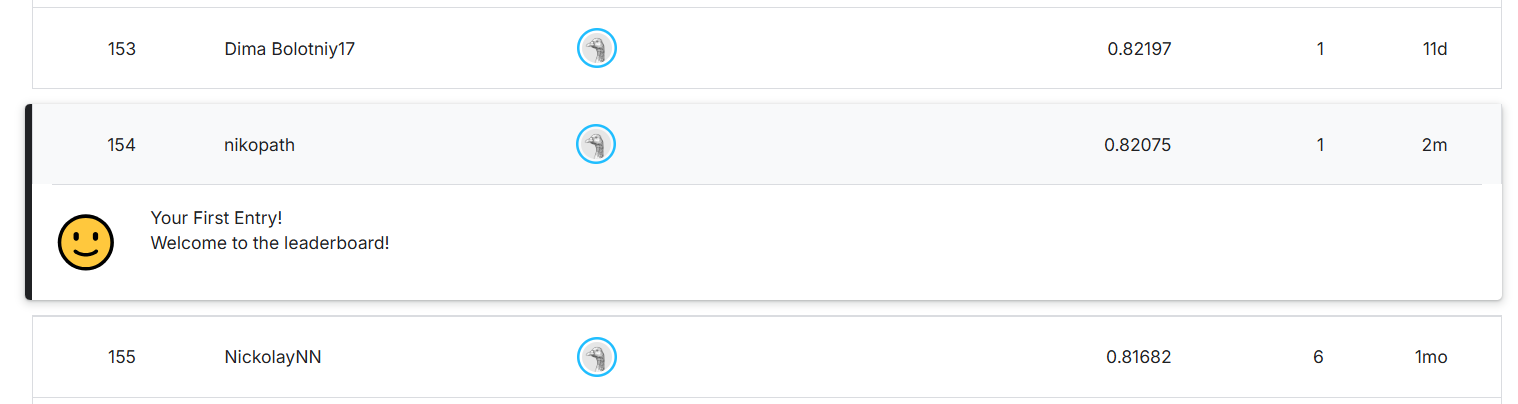